# PROYECTO 2 - Evaluación de calidad de carros - GUIA 2

**Participante: Carlos Andrés Zamora León**


El presente cuaderno presentará el desarrollo de la guía 2 del curso de Machine Learning de la Maestría en Ciencia de Datos. La idea de este ejercicio es utilizar una base dispuesta en el enlace UCI: Car Evaluation - UCI Machine Learning, a partir de ciertas características de los automóviles permite establecer una evaluación de calidad del auto.

Este ejercicio consiste en desarrollar un informe completo en un cuaderno Jupyter que deberá incluir:

Exploración y preparación de datos.
Generación de conjuntos de entrenamiento y testeo.
Informe de rendimiento de modelos tras la implementación.
Identificación de sobreajuste y análisis de resultados. 

Empezaremos importando las librerías de las cuales vamos a hacer uso:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Enseguida, vamos a importar el dataframe sobre el cual vamos a realizar el tratamiento de información, encontrándose este dentro del repositorio UCI: Car Evaluation, y siguiendo la estructura sugerida por la misma página para su correcta importación a Python:

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
df= pd.concat([X, y], axis=1)

In [4]:
# metadata 
print(car_evaluation.metadata) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

Exploramos las variables, dando una caracterización corta de su significancia:

In [7]:
# variable information 
print(car_evaluation.variables) 

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

Queremos ver ahora el resultado de nuestra tabla importada desde el UCI Repository:

In [12]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Realizaremos ahora un ejercicio de exploración y preparación de datos:

In [15]:
#Primeros 5 registros
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
#Últimos 5 registros
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [19]:
#Columnas y sus nombres
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [21]:
#Rango de índices
df.index

RangeIndex(start=0, stop=1728, step=1)

In [23]:
#Dimensiones del DataFrame
display("La dimensión del Dataframe es:",df.shape)

'La dimensión del Dataframe es:'

(1728, 7)

In [25]:
#Tipos de registros del data frame
display("Tipos de registros en el Dataframe:",df.dtypes)

'Tipos de registros en el Dataframe:'

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Información del dataframe, donde observamos que no hay registros nulos en ninguna de las columnas. Adicionalmente no es necesario realizar un análisis de valores duplicados dada la naturaleza informativa de la data, donde concluímos que las variables son categóricas de caracter cualitativo. 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [30]:
#Descripción del DataFrame
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Registraremos los conteos de cada variable e ilustraremos algunos puntos importantes para la interpretación de la información:

In [33]:
display("El conteo de variables de la columna buying es:", df['buying'].value_counts(),"El conteo de variables de la columna maint es:", df['maint'].value_counts(),"El conteo de variables de la columna doors es:", df['doors'].value_counts(),"El conteo de variables de la columna persons es:", df['persons'].value_counts(),"El conteo de variables de la columna lug_booot es:", df['lug_boot'].value_counts(),"El conteo de variables de la columna safety es:", df['safety'].value_counts(),"El conteo de variables de la columna class es:", df['class'].value_counts())

'El conteo de variables de la columna buying es:'

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

'El conteo de variables de la columna maint es:'

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

'El conteo de variables de la columna doors es:'

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

'El conteo de variables de la columna persons es:'

persons
2       576
4       576
more    576
Name: count, dtype: int64

'El conteo de variables de la columna lug_booot es:'

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

'El conteo de variables de la columna safety es:'

safety
low     576
med     576
high    576
Name: count, dtype: int64

'El conteo de variables de la columna class es:'

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

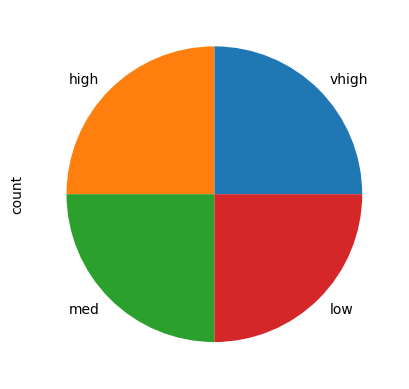

In [35]:
df["buying"].value_counts().plot(kind="pie")
plt.show()

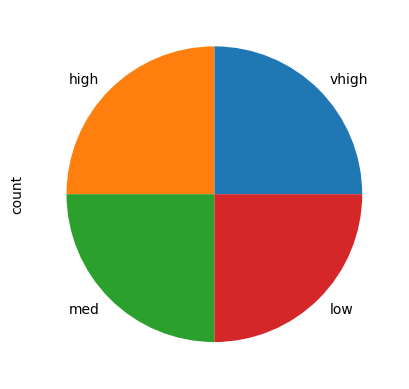

In [37]:
df["maint"].value_counts().plot(kind="pie")
plt.show()

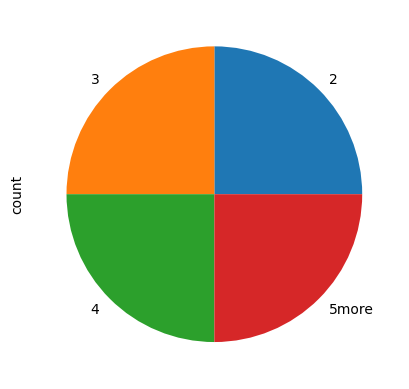

In [39]:
df["doors"].value_counts().plot(kind="pie")
plt.show()

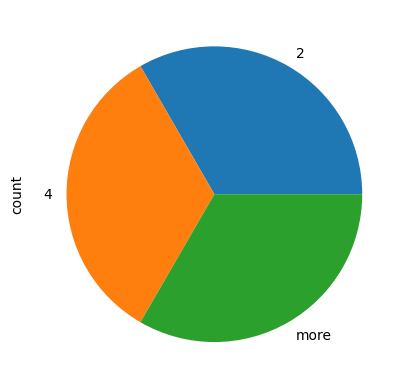

In [41]:
df["persons"].value_counts().plot(kind="pie")
plt.show()

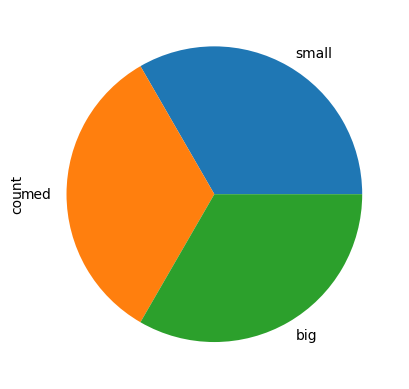

In [43]:
df["lug_boot"].value_counts().plot(kind="pie")
plt.show()

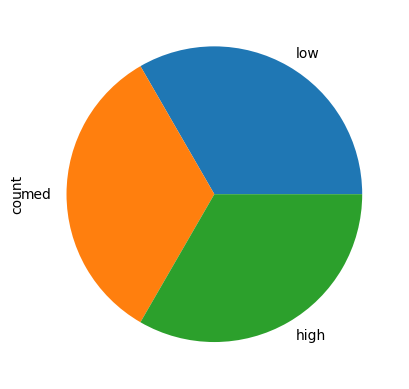

In [45]:
df["safety"].value_counts().plot(kind="pie")
plt.show()

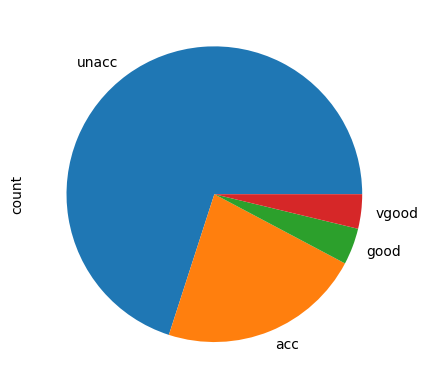

In [47]:
df["class"].value_counts().plot(kind="pie")
plt.show()

Con el objetivo de que las variables puedan ser más fácilmente interpretables, realizaremos un encoding general de los atributos mapeados en las líneas anteriores. Adicionalmente, realizaremos una copia del DataFrame para este nuevo tratamiento que vamos a realizar:

In [50]:
df_car = df.copy()

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_car.columns:
    df_car[i]=le.fit_transform(df_car[i])

df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


La variable objetivo para nuestro caso estudio será 'class' indica el nivel de evaluación(No aceptable, aceptable, bueno y muy bueno). Esta es la variable que queremos predecir con nuestro modelo de árbol de decisión. De esta manera, haremos que nuestro Feature, corresponda a nuestro DataFrame sin la columna "class", y nuestro objetivo sea la columna "class".

In [55]:
X = df_car.drop('class', axis=1)
y = df['class']
display(X)
display(y)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

Aplicaremos ahora varios modelos de aprendizaje y determinaremos los reportes de clasificación del paquete scikit-learn.

## Árbol de decisión

In [171]:
#Importando las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Crear y entrenar el modelo
modelo = DecisionTreeClassifier(max_depth=10, random_state=0)
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred= modelo.predict(X_test)
exactitud_arbol = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {exactitud_arbol: .2f}")


Exactitud del modelo:  0.98


Bajo los parámetros pre-establecidos del test size y el random state, definimos que la mejor profundidad que resulta en la mayor exactitud es de 10

In [174]:
X_test.iloc[0]

buying      2
maint       3
doors       3
persons     1
lug_boot    2
safety      1
Name: 954, dtype: int32

In [176]:
modelo.predict(X_test.iloc[[0]])

array(['unacc'], dtype=object)

In [178]:
y_pred = modelo.predict(X_test)
print(f"Reporte del modelo:\n {classification_report(y_test, y_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

         acc       0.98      0.94      0.96        64
        good       0.76      1.00      0.87        13
       unacc       0.99      1.00      0.99       251
       vgood       1.00      0.89      0.94        18

    accuracy                           0.98       346
   macro avg       0.94      0.96      0.94       346
weighted avg       0.98      0.98      0.98       346



In [180]:
#Evaluar el modelo
y_pred = modelo.predict(X_test)
print(f"Matriz de Confusión:\n {confusion_matrix(y_test, y_pred)}") 

Matriz de Confusión:
 [[ 60   2   2   0]
 [  0  13   0   0]
 [  1   0 250   0]
 [  0   2   0  16]]


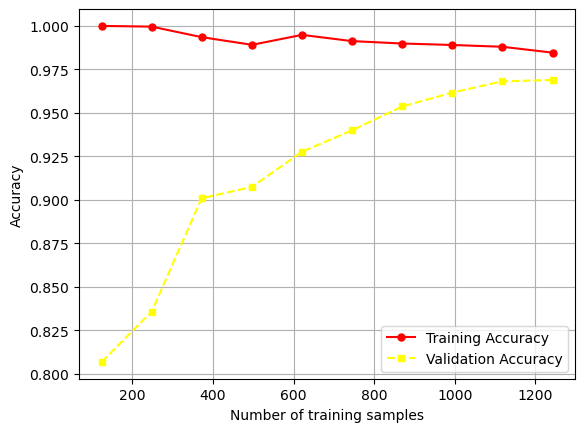

In [182]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=modelo, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label= 'Training Accuracy')
plt.plot(train_sizes, test_mean, color='yellow', linestyle='--', marker='s', markersize=5, label= 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Modelo de clasificación supervisada Random Forest

La idea central detrás de Random Forest es crear un "bosque" de árboles de decisión donde cada árbol es un poco diferente de los demás. Al hacer una predicción, Random Forest toma las decisiones de todos estos árboles individuales y las combina para producir un resultado más preciso y confiable que el que obtendría un solo árbol de decisión.

In [185]:
# Crear y entrenar el modelo
modelo_rf = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth=10)
modelo_rf.fit(X_train, y_train)

#Evaluar el modelo
y_rf_pred = modelo_rf.predict(X_test)
exactitud_rf = accuracy_score(y_test, y_rf_pred)
print(f"Exactitud del modelo: {exactitud_rf: .2f}")

Exactitud del modelo:  1.00


In [186]:
y_rf_prob = modelo_rf.predict_proba(X_test)
print(y_rf_prob)

[[0.01535985 0.         0.98464015 0.        ]
 [0.00133333 0.         0.99866667 0.        ]
 [0.02331984 0.         0.97668016 0.        ]
 ...
 [0.0032     0.00601667 0.98978333 0.001     ]
 [0.0015     0.         0.9985     0.        ]
 [0.03630714 0.         0.96369286 0.        ]]


In [228]:
y_rf_acc = y_rf_prob[:,0]

y_test_acc = y_test=='acc'

precision, recall, thresholds = precision_recall_curve(y_test_acc, y_rf_acc)

print(precision[0:5])
print(recall[0:5])
print(thresholds[0:5])

[0.72543353 0.69155844 0.69055375 0.68954248 0.68852459]
[1.         0.84860558 0.84462151 0.84063745 0.83665339]
[0.         0.0001     0.00011111 0.00015385 0.00023529]


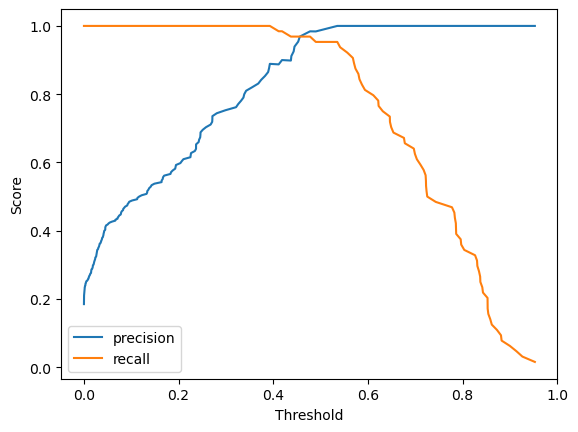

In [191]:
#Curva para comparar la precision con el recall
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

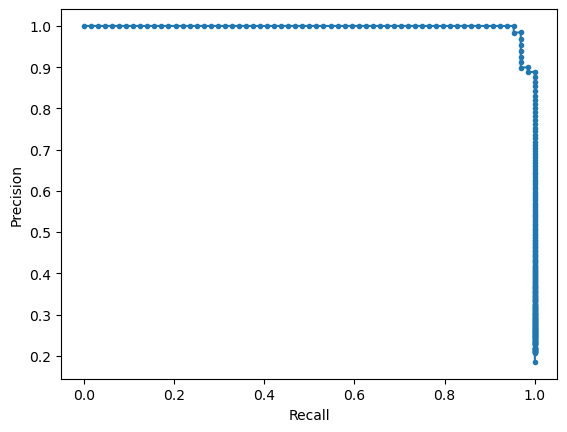

In [193]:
#Curva precision-recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [230]:
y_rf_unacc = y_rf_prob[:,0]

y_test_unacc = y_test=='unacc'

precision, recall, thresholds = precision_recall_curve(y_test_unacc, y_rf_unacc)

print(precision[0:5])
print(recall[0:5])
print(thresholds[0:5])

[0.72543353 0.69155844 0.69055375 0.68954248 0.68852459]
[1.         0.84860558 0.84462151 0.84063745 0.83665339]
[0.         0.0001     0.00011111 0.00015385 0.00023529]


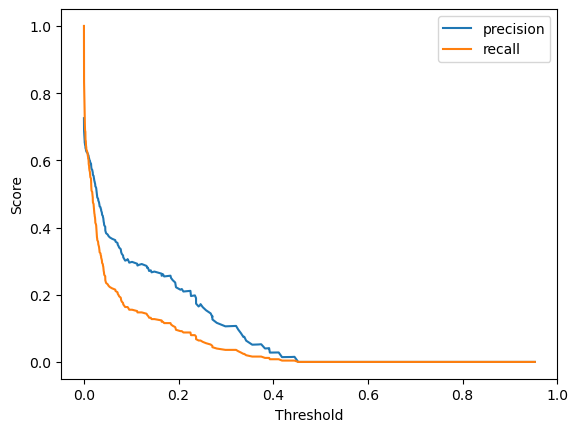

In [232]:
#Curva para comparar la precision con el recall
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

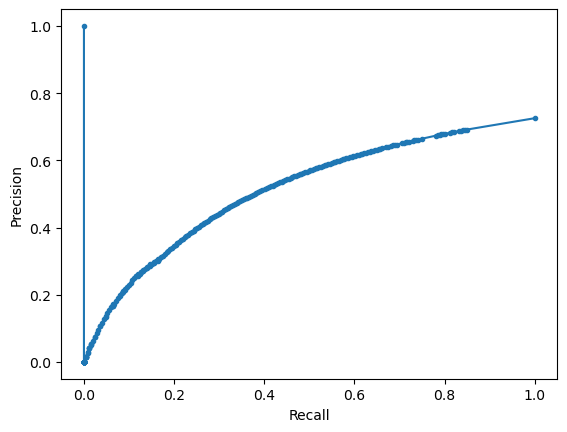

In [234]:
#Curva precision-recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [236]:
y_rf_good = y_rf_prob[:,0]

y_test_good = y_test=='good'

precision, recall, thresholds = precision_recall_curve(y_test_good, y_rf_good)

print(precision[0:5])
print(recall[0:5])
print(thresholds[0:5])

[0.03757225 0.04220779 0.04234528 0.04248366 0.04262295]
[1. 1. 1. 1. 1.]
[0.         0.0001     0.00011111 0.00015385 0.00023529]


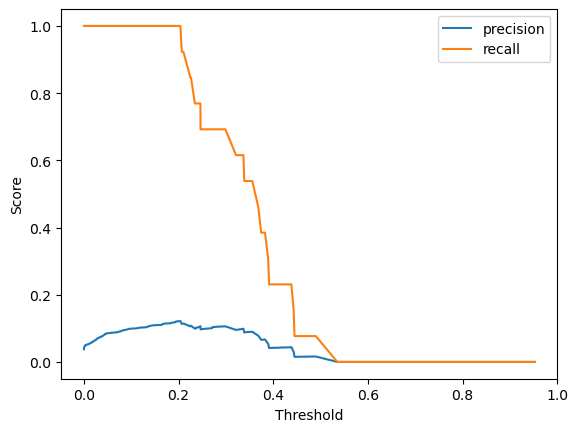

In [238]:
#Curva para comparar la precision con el recall
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

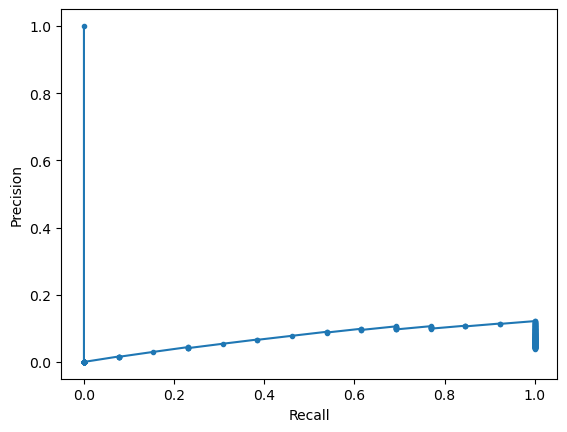

In [240]:
#Curva precision-recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [242]:
y_rf_vgood = y_rf_prob[:,0]

y_test_vgood = y_test=='vgood'

precision, recall, thresholds = precision_recall_curve(y_test_vgood, y_rf_vgood)

print(precision[0:5])
print(recall[0:5])
print(thresholds[0:5])

[0.05202312 0.05844156 0.05863192 0.05882353 0.05901639]
[1. 1. 1. 1. 1.]
[0.         0.0001     0.00011111 0.00015385 0.00023529]


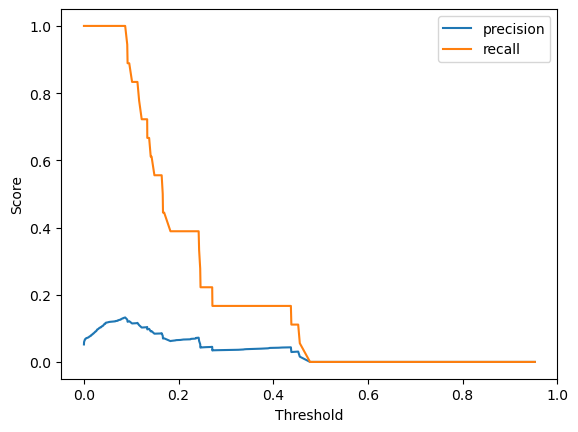

In [244]:
#Curva para comparar la precision con el recall
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

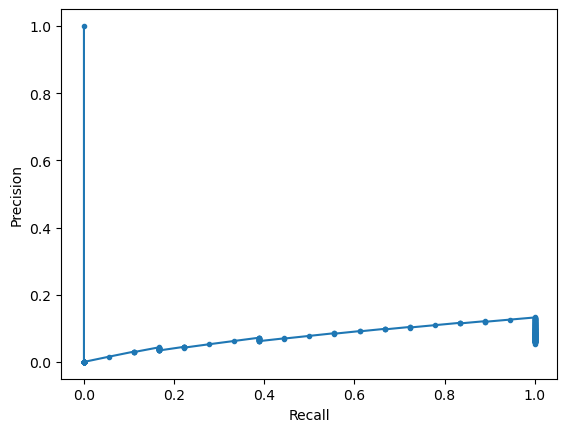

In [246]:
#Curva precision-recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [195]:
y_rf_pred = modelo_rf.predict(X_test)
print(f"Reporte del modelo: \n {classification_report(y_test, y_rf_pred, zero_division=0)}")

Reporte del modelo: 
               precision    recall  f1-score   support

         acc       0.98      1.00      0.99        64
        good       1.00      0.92      0.96        13
       unacc       1.00      1.00      1.00       251
       vgood       1.00      1.00      1.00        18

    accuracy                           1.00       346
   macro avg       1.00      0.98      0.99       346
weighted avg       1.00      1.00      1.00       346



In [197]:
#Evaluar el modelo
y_rf_pred = modelo_rf.predict(X_test)
print(f"Matriz de Confusión: \n {confusion_matrix(y_test, y_rf_pred)}") 

Matriz de Confusión: 
 [[ 64   0   0   0]
 [  1  12   0   0]
 [  0   0 251   0]
 [  0   0   0  18]]


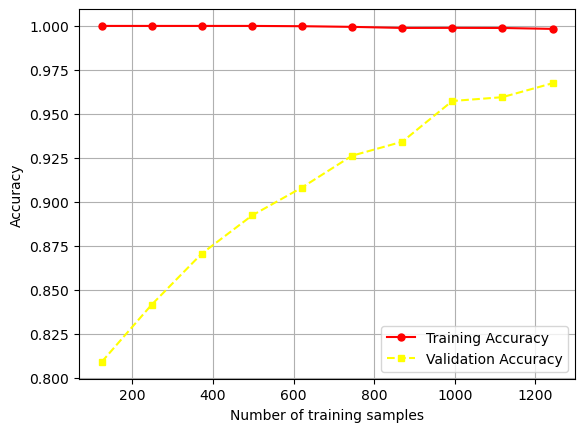

In [199]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelo_rf, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label= 'Training Accuracy')
plt.plot(train_sizes, test_mean, color='yellow', linestyle='--', marker='s', markersize=5, label= 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Modelo de regresión logística

In [202]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(random_state=0, solver ='newton-cg')
clf.fit(X_train_scaled, y_train)

## Predicción

y_rl_pred = clf.predict(X_test_scaled)

## Evaluación


exactitud_rl = accuracy_score(y_test, y_rl_pred)
print(f"Exactitud del modelo: {exactitud_rl: .2f}")

Exactitud del modelo:  0.71


In [204]:
y_rl_pred = clf.predict(X_test_scaled)
print(f"Reporte del modelo: \n {classification_report(y_test, y_rl_pred, zero_division=0)}")

Reporte del modelo: 
               precision    recall  f1-score   support

         acc       0.34      0.23      0.28        64
        good       0.00      0.00      0.00        13
       unacc       0.77      0.91      0.84       251
       vgood       0.50      0.17      0.25        18

    accuracy                           0.71       346
   macro avg       0.40      0.33      0.34       346
weighted avg       0.65      0.71      0.67       346



In [206]:
#Evaluar el modelo
y_rl_pred = clf.predict(X_test)
print(f"Matriz de Confusión: \n {confusion_matrix(y_test, y_rl_pred)}") 

Matriz de Confusión: 
 [[ 16   0  48   0]
 [  3   0  10   0]
 [ 22   0 229   0]
 [  9   0   9   0]]


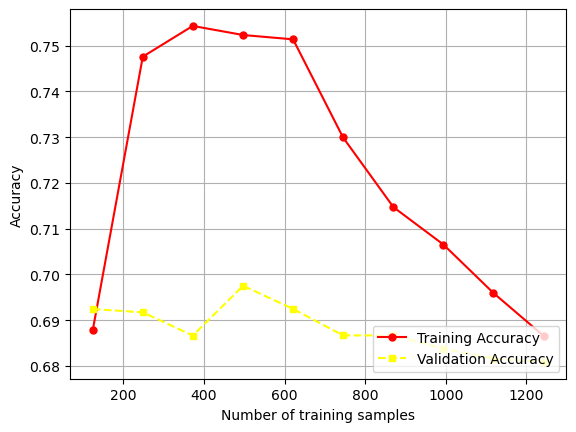

In [208]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label= 'Training Accuracy')
plt.plot(train_sizes, test_mean, color='yellow', linestyle='--', marker='s', markersize=5, label= 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Modelo de red neuronal

In [217]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, )

clf.fit(X_train, y_train)

y_clf_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

exactitud_clf = accuracy_score(y_test, y_clf_pred)
print(f"Exactitud del modelo: {exactitud_clf: .2f}")


              precision    recall  f1-score   support

         acc       0.77      0.89      0.83        64
        good       0.30      0.23      0.26        13
       unacc       0.99      0.96      0.97       251
       vgood       0.78      0.78      0.78        18

    accuracy                           0.91       346
   macro avg       0.71      0.71      0.71       346
weighted avg       0.91      0.91      0.91       346

Exactitud del modelo:  0.91


In [219]:
y_clf_pred = clf.predict(X_test)
print(f"Reporte del modelo: \n {classification_report(y_test, y_clf_pred, zero_division=0)}")

Reporte del modelo: 
               precision    recall  f1-score   support

         acc       0.77      0.89      0.83        64
        good       0.30      0.23      0.26        13
       unacc       0.99      0.96      0.97       251
       vgood       0.78      0.78      0.78        18

    accuracy                           0.91       346
   macro avg       0.71      0.71      0.71       346
weighted avg       0.91      0.91      0.91       346



In [221]:
#Evaluar el modelo
y_clf_pred = clf.predict(X_test)
print(f"Matriz de Confusión: \n {confusion_matrix(y_test, y_clf_pred)}") 

Matriz de Confusión: 
 [[ 57   4   3   0]
 [  6   3   0   4]
 [ 10   0 241   0]
 [  1   3   0  14]]


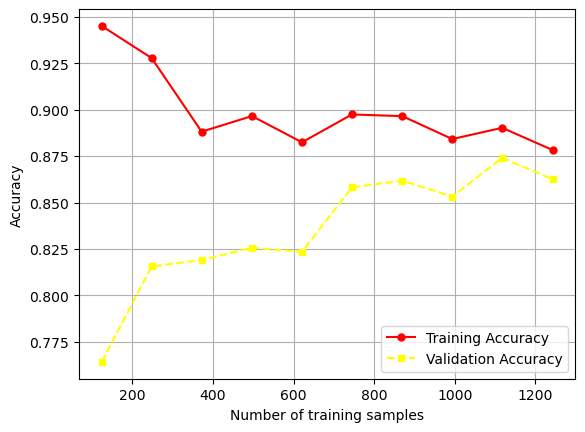

In [223]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label= 'Training Accuracy')
plt.plot(train_sizes, test_mean, color='yellow', linestyle='--', marker='s', markersize=5, label= 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

exactitud_knn = accuracy_score(y_test, y_knn_pred)
print(f"Exactitud del modelo: {exactitud_knn: .2f}")

Exactitud del modelo:  0.91


In [150]:
y_knn_pred = knn.predict(X_test)
print(f"Reporte del modelo: \n {classification_report(y_test, y_knn_pred, zero_division=0)}")

Reporte del modelo: 
               precision    recall  f1-score   support

         acc       0.91      0.72      0.81        83
        good       0.75      0.82      0.78        11
       unacc       0.91      0.99      0.95       235
       vgood       1.00      0.71      0.83        17

    accuracy                           0.91       346
   macro avg       0.89      0.81      0.84       346
weighted avg       0.91      0.91      0.90       346



In [152]:
#Evaluar el modelo
y_knn_pred = knn.predict(X_test)
print(f"Matriz de Confusión: \n {confusion_matrix(y_test, y_knn_pred)}") 

Matriz de Confusión: 
 [[ 60   2  21   0]
 [  2   9   0   0]
 [  2   0 233   0]
 [  2   1   2  12]]


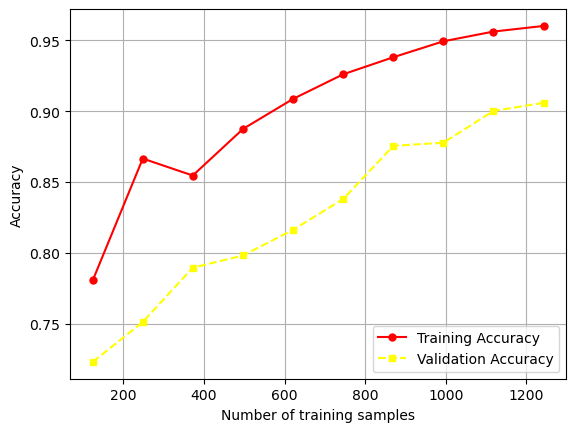

In [154]:
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label= 'Training Accuracy')
plt.plot(train_sizes, test_mean, color='yellow', linestyle='--', marker='s', markersize=5, label= 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## SVM

In [158]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1.0, random_state=0)
svc.fit(X_train, y_train)

y_svc_pred = svc.predict(X_test)

exactitud_svc = accuracy_score(y_test, y_svc_pred)
print(f"Exactitud del modelo: {exactitud_svc: .2f}")

Exactitud del modelo:  0.70


In [160]:
y_svc_pred = svc.predict(X_test)
print(f"Reporte del modelo: \n {classification_report(y_test, y_svc_pred, zero_division=0)}")

Reporte del modelo: 
               precision    recall  f1-score   support

         acc       0.47      0.11      0.18        83
        good       0.00      0.00      0.00        11
       unacc       0.71      0.99      0.83       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.70       346
   macro avg       0.30      0.27      0.25       346
weighted avg       0.60      0.70      0.60       346



In [162]:
#Evaluar el modelo
y_svc_pred = svc.predict(X_test)
print(f"Matriz de Confusión: \n {confusion_matrix(y_test, y_svc_pred)}") 

Matriz de Confusión: 
 [[  9   0  74   0]
 [  0   0  11   0]
 [  3   0 232   0]
 [  7   0  10   0]]


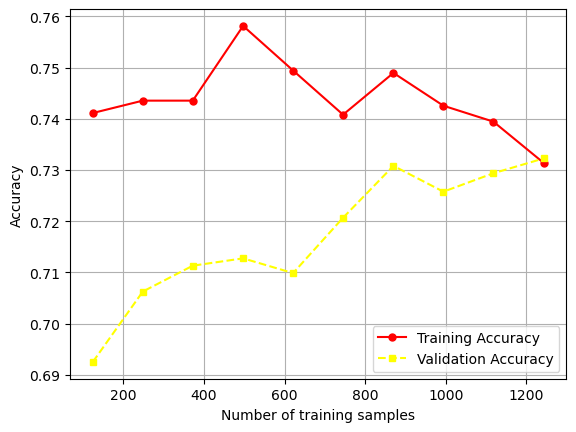

In [164]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svc, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label= 'Training Accuracy')
plt.plot(train_sizes, test_mean, color='yellow', linestyle='--', marker='s', markersize=5, label= 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Conclusiones

El aprendizaje automático supervisado, evaluado con una serie de modelos es una herramienta poderosa para extraer información valiosa de los datos y tomar decisiones basadas en evidencia. Nos van a servir para tomar decisiones basadas en resultados, en evidencia, precisión, efectividad, haciendo uso de modelos de entrenamiento y probabildiad que nos lleven a las mejores predicciones.

Hemos realizado un pre tratamiento de la información, con el fin de garantizar que los datos estén lo más limpio posibles par asu visualización y tratamiento. Para ello hemos revisado características generales y específicas del DataFrame, hemos realizado visualizaciones y finalmente hemos realizado un encoding con el fin de preparar nuestra información para su posterior tratamiento con la aplicación de modelos.

Hemos realizado un análisis exhaustivo para el modelo de Random Forest, dado que es el que mejores resultados nos presentó, específicamente para la evaluación de los valores aceptables.

Cuando manipulamos parámetros de nuestros modelos como los estimadores, el número de criterios, la profundidad, características, nodos etc, podemos ver cómo podemos llegar a un nivel de precisión superior. Esto nos dice que, la manipulación de la aplicación de métodos, puede hacer mejor o peor nuestra aplicación, por lo que debemos ser muy cuidadosos y rigurosos con estos factores de corrección. 

Normalmente la comprensión del funcionamiento de cada modelo supervisado es simple y a la vez muy potente.